In [98]:
import numpy as np
#read image adress
import os
# image library
from PIL import Image

In [99]:
#khai bien doc dia chi
train_data ='drive/MyDrive/AI/pic/train'
test_data='drive/MyDrive/AI/pic/test'
validation_data='drive/MyDrive/AI/pic/validations'

In [100]:
listdata_train=[]
listdata_test=[]
listdata_validation=[]
dict={'nguyen':[1],'dogs':[0]}

In [101]:
def Getdata(dirdata,lstdata):
#doc hinh anh trong tap du lieu
  for whatever in os.listdir(dirdata):
      whatever_path = os.path.join(dirdata,whatever)
      lst_filename_path=[]
      for filename in os.listdir(whatever_path):
        filename_path=os.path.join(whatever_path,filename)
        label=filename_path.split('/')[5]
        img = np.array(Image.open(filename_path))
        lst_filename_path.append((img,dict[label]))
      lstdata.extend(lst_filename_path)
  for i in range(3):
      np.random.shuffle(lstdata)
  return lstdata

In [102]:
listdata_train=Getdata(train_data,listdata_train)
listdata_test=Getdata(test_data,listdata_test)
listdata_validation=Getdata(validation_data,listdata_validation)

In [103]:
x_train=np.array([x[0] for _ ,x in enumerate(listdata_train)])
y_train=np.array([y[1] for _ ,y in enumerate(listdata_train)])
y_train.shape

(56, 1)

In [104]:
x_test=np.array([x[0] for _ ,x in enumerate(listdata_test)])
y_test=np.array([y[1] for _ ,y in enumerate(listdata_test)])

In [105]:
x_validation=np.array([x[0] for _ ,x in enumerate(listdata_validation)])
y_validation=np.array([y[1] for _ ,y in enumerate(listdata_validation)])
x_validation.shape

(14, 150, 150, 3)

In [106]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import categorical_crossentropy

In [107]:
yname=y_train.flatten()

In [108]:
class_names=['dogs','nguyen']
x_pre=x_test
y_pre=y_test
y_pre

array([[0],
       [0],
       [1],
       [1],
       [0],
       [1]])

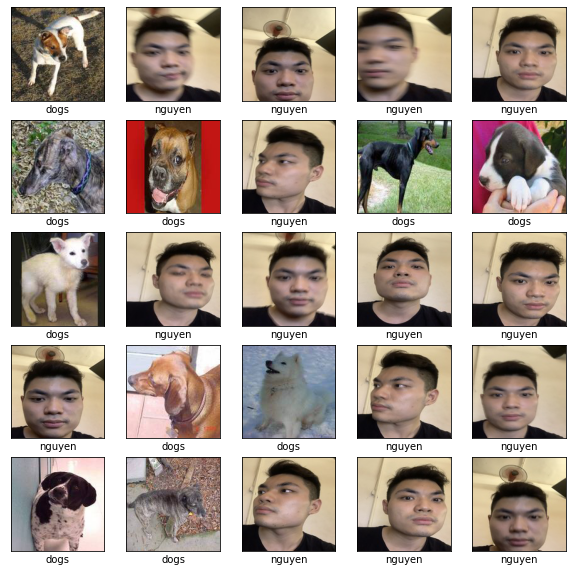

In [109]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(class_names[yname[i]])
plt.show()

In [111]:
from keras.utils import np_utils
x_train=x_train.reshape(56,67500)
x_test=x_test.reshape(6,67500)
x_validation=x_validation.reshape(14,67500)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_validation=x_validation.astype('float32')
x_train/=255
x_test/=255
x_validation/=255
y_train=np_utils.to_categorical(y_train,2)
y_test= np_utils.to_categorical(y_test,2)
y_validation= np_utils.to_categorical(y_validation,2)

In [112]:
model=Sequential()
model.add(Dense(1000,activation='relu',input_shape=(67500,)))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              67501000  
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 68,504,002
Trainable params: 68,504,002
Non-trainable params: 0
_________________________________________________________________


In [113]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=90,epochs=200,verbose=1,validation_data=(x_validation,y_validation),callbacks=[EarlyStopping(monitor='val_loss',patience = 30)]) #epochs số lần học

Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 0.8001 - accuracy: 0.4464 - val_loss: 752.5161 - val_accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 1s 853ms/step - loss: 660.6278 - accuracy: 0.5357 - val_loss: 857.8239 - val_accuracy: 0.5000
Epoch 3/200
1/1 [==============================] - 1s 924ms/step - loss: 942.0318 - accuracy: 0.4643 - val_loss: 56.8442 - val_accuracy: 0.5000
Epoch 4/200
1/1 [==============================] - 1s 841ms/step - loss: 57.7599 - accuracy: 0.4643 - val_loss: 217.5742 - val_accuracy: 0.5000
Epoch 5/200
1/1 [==============================] - 1s 826ms/step - loss: 190.4376 - accuracy: 0.5357 - val_loss: 0.1736 - val_accuracy: 0.8571
Epoch 6/200
1/1 [==============================] - 1s 836ms/step - loss: 11.2274 - accuracy: 0.5536 - val_loss: 4.8060 - val_accuracy: 0.5714
Epoch 7/200
1/1 [==============================] - 1s 873ms/step - loss: 8.0535 - accuracy: 0.6964 - val_loss: 93.4721 - val_accuracy: 0.5000
